**Investigating Consumer Spending Habits: A Visualization Analysis of Category and Item Data**
---







**Project Overview**

This project analyzes individual spending patterns across various categories using a synthetic dataset. The aim is to uncover behavior trends, payment preferences, and category-wise expenditure to help understand consumer financial behavior.


**Problem Statement**

Modern consumers engage in diverse spending activities, ranging from groceries and housing to fitness and leisure. Understanding these behaviors helps in:
- Personal budgeting and finance planning
- Creating targeted financial advice or services
- Offering better category-level insights



**Hypotheses**

1. **H1:** Consumers spend the most on housing and utilities.
2. **H2:** Most transactions are conducted via debit cards.
3. **H3:** In-store purchases account for a larger share of total spending compared to mobile apps.
4. **H4:** Certain categories (e.g., gifts or entertainment) show seasonal spikes.




**Step 1: Import Libraries and upload data**

In [ ]:
import pandas as
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('Final Project Data Setz.xlsx - spending_patterns_detailed.csv')

In [ ]:
#Data Processiing

# Convert Transaction Date to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Extract Month and Year
df['Month'] = df['Transaction Date'].dt.to_period('M')

# Map categories to Necessity or Discretionary
necessity = ['Groceries', 'Housing and Utilities', 'Healthcare']
df['Type'] = df['Category'].apply(lambda x: 'Necessity' if x in necessity else 'Discretionary')

# Group by Month and Type
monthly_spending = df.groupby(['Month', 'Type'])['Total Spent'].sum().unstack()
monthly_spending = monthly_spending.fillna(0)
monthly_spending.head()


Monthly Necessity vs Discretionary Spending: The line chart shows the total monthly spending of the two explored categories.

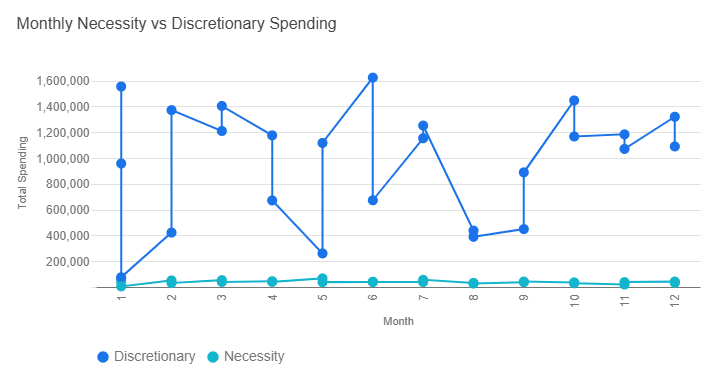

In [ ]:
import altair as alt

# Convert Period index to datetime and reset for plotting
monthly_spending_reset = monthly_spending.copy()
monthly_spending_reset.index = monthly_spending_reset.index.to_timestamp()
monthly_spending_reset = monthly_spending_reset.reset_index()

# Melt wide-form to long-form for Altair
melted_df = monthly_spending_reset.melt(id_vars='Month',
                                         value_vars=['Necessity', 'Discretionary'],
                                         var_name='Category Type',
                                         value_name='Total Spent')

# Create the Altair line chart
chart = alt.Chart(melted_df).mark_line(point=True).encode(
    x=alt.X('Month:T', title='Month'),
    y=alt.Y('Total Spent:Q', title='Total Spending'),
    color=alt.Color('Category Type:N', title='Category Type'),
    tooltip=['Month:T', 'Category Type:N', 'Total Spent:Q']
).properties(
    title='Monthly Necessity vs Discretionary Spending',
    width=700,
    height=400
).interactive()



Monthly Spending on Necessity Categories:The chart shows total spending on necessity items each month. Spending on necessity items remains relatively consistent throughout the year, with minor fluctuations.

Monthly Spending on Discretionary Categories: The chart shows total spending on discretionary items each month. The data shows a strong seasonal pattern with significant fluctuations.

The two charts provide a clear visual distinction of the spending patterns for each category type. The visualization of this data supports the project hypothesis.

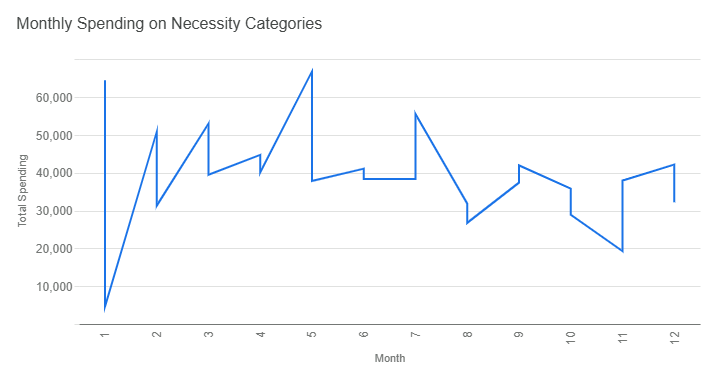

In [ ]:
import altair as alt
import pandas as pd

monthly_spending['Month'] = pd.to_datetime(monthly_spending['Month'])

# Filter for Necessity spending
necessity_spending = monthly_spending[monthly_spending['Category Type'] == 'Necessity']

# Create the Necessity spending chart
chart_necessity = alt.Chart(necessity_spending).mark_line(point=True).encode(
    x=alt.X('Month:T', title='Month'),
    y=alt.Y('Total Spent:Q', title='Total Spending'),
    tooltip=[
        alt.Tooltip('Month:T', title='Month', format='%b %Y'),
        alt.Tooltip('Total Spent:Q', title='Total Spent', format='$,.2f')
    ]
).properties(
    title='Monthly Spending on Necessity Categories',
    width=700,
    height=400
).interactive()

# Save the chart
chart_necessity.save('monthly_spending_on_necessity_categories.json')



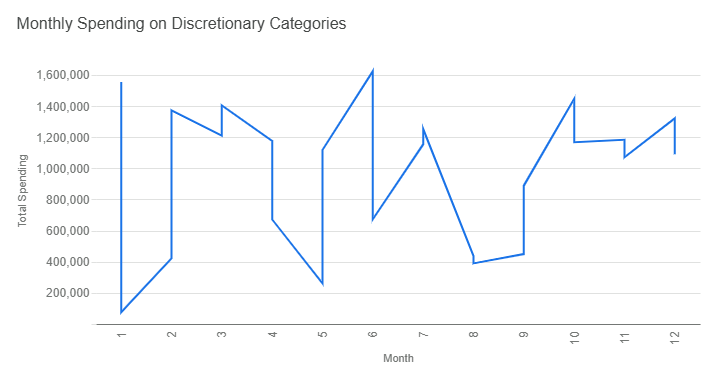

In [ ]:
import altair as alt
import pandas as pd

monthly_spending['Month'] = pd.to_datetime(monthly_spending['Month'])

# Filter for Discretionary spending
discretionary_spending = monthly_spending[monthly_spending['Category Type'] == 'Discretionary']

# Create the Discretionary spending chart
chart_discretionary = alt.Chart(discretionary_spending).mark_line(point=True).encode(
    x=alt.X('Month:T', title='Month'),
    y=alt.Y('Total Spent:Q', title='Total Spending'),
    tooltip=[
        alt.Tooltip('Month:T', title='Month', format='%b %Y'),
        alt.Tooltip('Total Spent:Q', title='Total Spent', format='$,.2f')
    ]
).properties(
    title='Monthly Spending on Discretionary Categories',
    width=700,
    height=400
).interactive()

# Save the chart
chart_discretionary.save('monthly_spending_on_discretionary_categories.json')


The Chart titled "Monthly Discretionary Spending by Category" shows the breakdown of discretionary spending for each month across various cateogories.



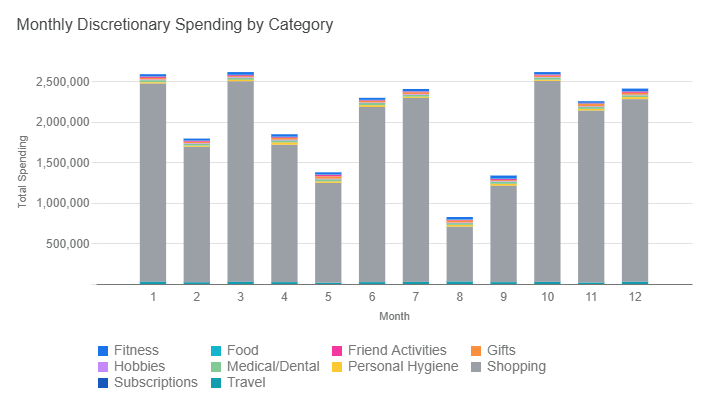

In [ ]:
import altair as alt
import pandas as pd

monthly_discretionary_spending_by_category['Month'] = pd.to_datetime(
    monthly_discretionary_spending_by_category['Month']
).dt.strftime('%b %Y')

# Create the stacked bar chart
chart = alt.Chart(monthly_discretionary_spending_by_category).mark_bar().encode(
    x=alt.X('Month:N', title='Month', sort=None),
    y=alt.Y('Total Spent:Q', title='Total Spending'),
    color=alt.Color('Category:N', title='Category'),
    tooltip=[
        alt.Tooltip('Month:N', title='Month'),
        alt.Tooltip('Category:N', title='Category'),
        alt.Tooltip('Total Spent:Q', title='Total Spent', format='$,.2f')
    ]
).properties(
    title='Monthly Discretionary Spending by Category',
    width=700,
    height=400
).interactive()




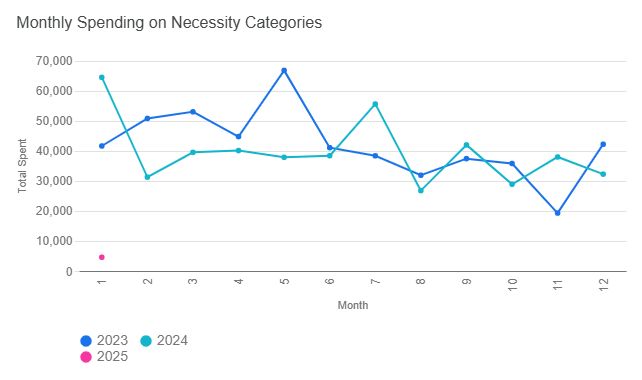

In [ ]:
import altair as alt
import pandas as pd

monthly_necessity_spending_per_year['Date'] = pd.to_datetime(
    monthly_necessity_spending_per_year[['Year', 'Month']].assign(DAY=1)
)

# Create the line chart
monthly_necessity_chart = alt.Chart(monthly_necessity_spending_per_year).mark_line(point=True).encode(
    x=alt.X('Date:T', title='Month'),
    y=alt.Y('Total Spent:Q', title='Total Spending'),
    color=alt.Color('Year:N', title='Year'),
    tooltip=[
        alt.Tooltip('Date:T', title='Month', format='%b %Y'),
        alt.Tooltip('Total Spent:Q', title='Total Spent', format='$,.2f')
    ]
).properties(
    title='Monthly Spending on Necessity Categories Per Year',
    width=700,
    height=400
).interactive()






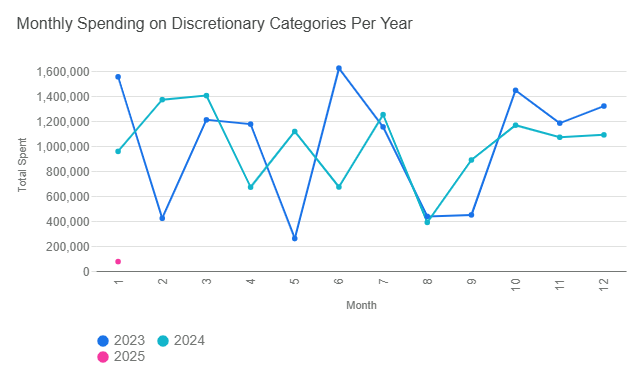

In [ ]:
import altair as alt
import pandas as pd

monthly_discretionary_spending_Per_Year['Date'] = pd.to_datetime(
    monthly_discretionary_spending_Per_Year[['Year', 'Month']].assign(DAY=1)
)

# Create the line chart
monthly_discretionary_chart = alt.Chart(monthly_discretionary_spending_Per_Year).mark_line(point=True).encode(
    x=alt.X('Date:T', title='Month'),
    y=alt.Y('Total Spent:Q', title='Total Spending'),
    color=alt.Color('Year:N', title='Year'),
    tooltip=[
        alt.Tooltip('Date:T', title='Month', format='%b %Y'),
        alt.Tooltip('Total Spent:Q', title='Total Spent', format='$,.2f')
    ]
).properties(
    title='Monthly Spending on Discretionary Categories Per Year',
    width=700,
    height=400
).interactive()





**Conclusion:**
This project set out to explore the consumer spending behavior by analyzing transactional data across necessity and discretionary categories. The central hypothesis propsed that spending on necessities (i.e. rent and utilities) would remain stable throughout the year while discretionary spending (i.e. dining out and travel) would display more seasonal variation. Throught a series of visual analyses, we were able to investigat and support this hypothesis.

The project findings showed that necessity spending remained at consistent from month to month reflecting the fixed nature of these expenses. In contrast, discretionary spending show notable peasks during certain times of the year. Such as the summer and winter seasons. These trends were visualized through time- series line charts and bar graphs. Further emphasizing the seasonal fluctuations and the specific discretionary categories causing it.

Year to year data was put to analysis. This gave a greater scope on broader changes in spending patterns. Potential factors being economic or a change in consumer habits. These visualizations gave a clear understanding of when and where consumer behaviors diverged.

While the project provided significant insights, some limitations should be addressed. Classifying the categories into "necessity" and "discretionary" introduced a degree of subjectivity. Additionally, the data did not factor for external influences such as income variability, which could have further explained the spending patterens observed.

